## Exploratory Data Analysis of Social Behavior in Introverts and Extroverts

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Introduction
        This pet project of mine analyzes how personality types (Introvert vs Extrovert) relate to various social behavior metrics using data analysis and visualization. By comparing distributions, applying PCA, and summarizing patterns and outputs, we can uncover how these different personality types differ from each other.

In [2]:
personalityData = pd.read_csv("Dataset/personality_dataset.csv")

In [3]:
personalityData.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
personalityData.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [14]:
print("\n--- 2. Initial Data Inspection ---")
print("Dataset Shape:", personalityData.shape)
print("\nDataset Info:")
personalityData.info()


--- 2. Initial Data Inspection ---
Dataset Shape: (2900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
print("\nDescriptive statistics for numerical columns:")
print(personalityData.describe())


Descriptive statistics for numerical columns:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        

In [7]:
print("Values count for categorical columns:")
for col in personalityData.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(personalityData[col].value_counts())
    print(f"Unique values: {personalityData[col].nunique()}")

Values count for categorical columns:

Stage_fear:
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
Unique values: 2

Drained_after_socializing:
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64
Unique values: 2

Personality:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
Unique values: 2


In [8]:
# --- 3. Handle Missing Values ---
print("\n--- 3. Handling Missing Values ---")
print("Missing values before handling:")
print(personalityData.isnull().sum())


--- 3. Handling Missing Values ---
Missing values before handling:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


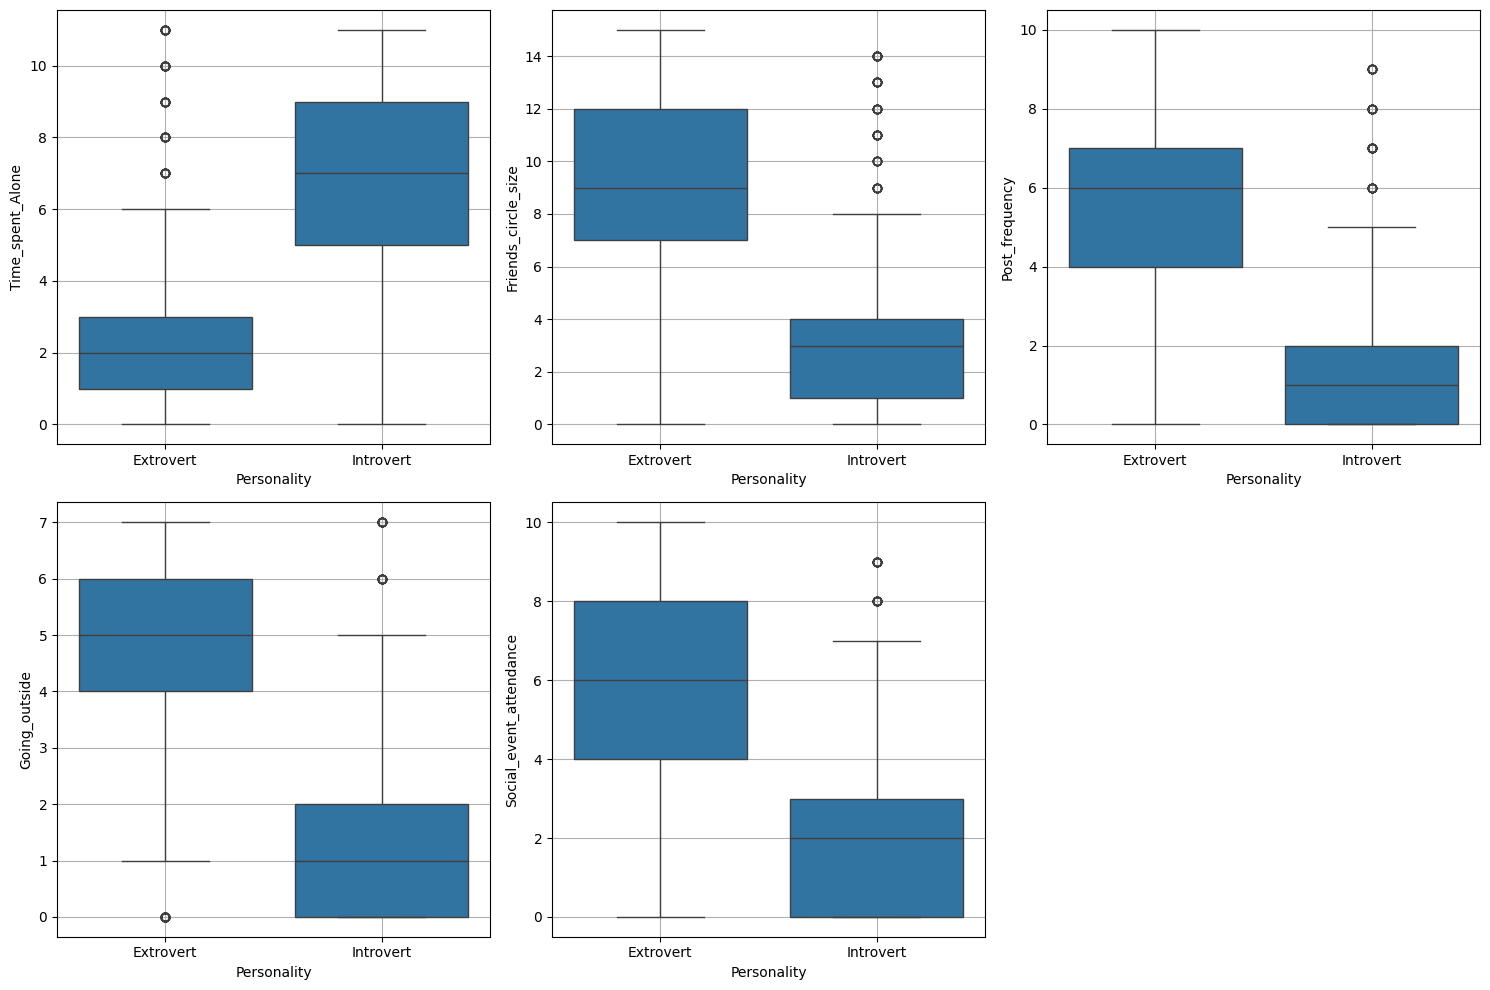

In [9]:
features = [
    'Time_spent_Alone',
    'Friends_circle_size',
    'Post_frequency',
    'Going_outside',
    'Social_event_attendance'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=personalityData, x="Personality", y=feature)

    plt.xlabel("Personality")
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

**Box-Plot Insights: Numeric Features vs Personality**

| Feature | Extrovert (median · IQR) | Introvert (median · IQR) | Visual takeaway |
|---------|-------------------------|--------------------------|-----------------|
| **Time_spent_Alone** | ~ 2 hrs · narrow (0–3) | ~ 7 hrs · wide (5–9) | Introverts spend conspicuously more solo time; separation is strong. |
| **Social_event_attendance** | ~ 6 events · tight | ~ 2 events · tight | Clear inverse of “alone time”: Extroverts attend ~3× more events. |
| **Going_outside** | Median ≈ 5 trips | Median ≈ 1 trip | Activity level outdoors sharply discriminates classes. |
| **Friends_circle_size** | Median ≈ 8–10 friends | Median ≈ 3–4 friends | Network size is a robust extroversion signal. |
| **Post_frequency** | Median ≈ 6–7 posts | Median ≈ 1–2 posts | Online activity mirrors offline sociability. |

**Key take-aways**
<br> 
 - **Introverts and Extroverts Show Distinct Social Lifestyles**
   - The distributions barely overlap in key variables like Time_spent_Alone, Friends_circle_size, and Post_frequency, which suggests personality type is highly predictive of social and digital behavior.<br>
 - **Time Alone vs Social Event Attendance → Strong Inverse Relationship**
   <br> As shown in both Time_spent_Alone and Social_event_attendance:<br>
    - **Introverts** spend more time alone and attend fewer events. <br>
    - **Extroverts** attend ~3× more events, suggesting higher need or tolerance for stimulation.
 -  **‘Going_outside’ Is the Sharpest Behavioral Separator** <br>
    - The difference in medians and IQRs is stark. <br>
    - Almost all extroverts go outside ≥ 5 times, while introverts hover near 1 trip.<br>
    - This could be the strongest single-variable classifier for personality.

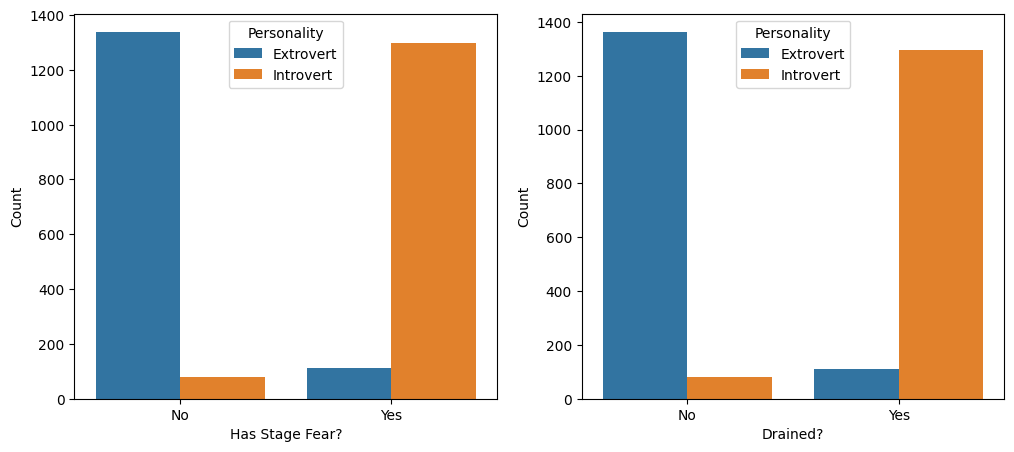

In [10]:
categoricalFeature = {"Stage_fear": "Has Stage Fear?", "Drained_after_socializing": "Drained?"}
iter = 1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
for i, (key, value) in enumerate(categoricalFeature.items()):
    sns.countplot(x=key, hue="Personality", data=personalityData, ax=axes[i])
    # axes[i].set_title(value)
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(value)
 

### Observations on Categorical Social Traits

#### 1. Stage Fear
- A significantly higher number of **Introverts** reported having stage fear compared to Extroverts.
- In contrast, most **Extroverts** indicated they **do not** experience stage fear.
- This aligns with common personality belief that extroverts are often more comfortable in public or social performance scenarios, while introverts may find such situations more stressful or overwhelming.

#### 2. Drained After Socializing
- A large portion of **Introverts** reported feeling **drained** after social interaction.
- Most **Extroverts** reported **not feeling drained**, suggesting they may even draw energy from social engagement.
- This supports the general behavioral pattern that introverts recharge through solitude, whereas extroverts tend to feel energized by social activity.


<Axes: >

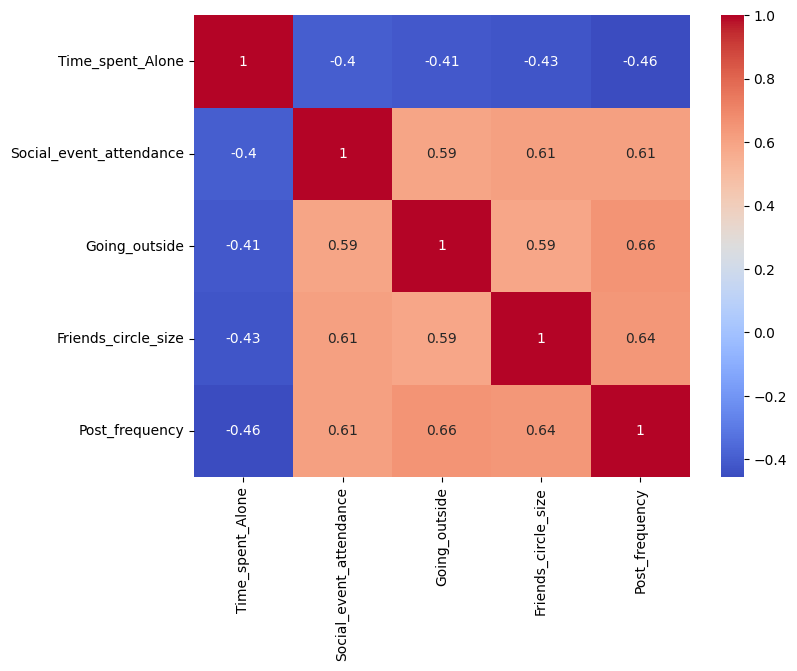

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(personalityData[personalityData['Personality'] == 'Introvert'].corr(numeric_only=True), annot=True, cmap='coolwarm')

### Heatmap Observations

    The heatmap shows the pairwise Pearson correlations between continuous social behavior features.

#### Key Observations:

- **Time Spent Alone** shows a **moderate negative correlation** with all other features:
  - It correlates negatively with **Social Event Attendance (-0.40)**, **Going Outside (-0.41)**, **Friends Circle Size (-0.43)**, and **Post Frequency (-0.46)**.
  - **Interpretation**: The more time someone spends alone, the less likely they are to engage socially validating a known introverted behavior pattern.

- **Post Frequency** shows **strong positive correlations** with:
  - **Going Outside (0.66)**
  - **Friends Circle Size (0.64)**
  - **Social Event Attendance (0.61)**
  - **Interpretation**: Individuals who are more active socially (in-person) also tend to be more active online, suggesting extroverted behavior traits.

- **Friends Circle Size** is positively correlated with all other social traits except **Time spent alone which has a negative correlation** especially:
  - **Post Frequency (0.64)** and **Social Event Attendance (0.61)**
  - **Interpretation**: Having a larger social circle is often tied to greater social participation, both offline and online.

#### General Insight:
This heatmap reinforces obvious behavioral patterns. Extroverts are more socially active across multiple dimensions, while introverts show the opposite trend, especially in solitary behavior.


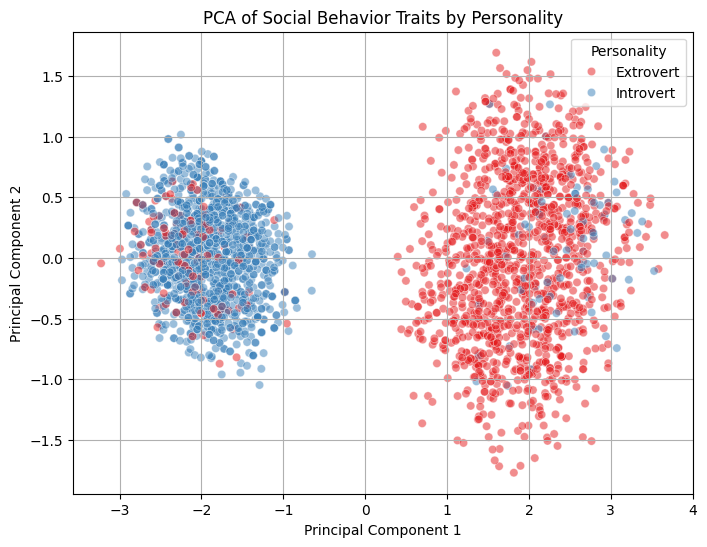

Explained Variance Ratio: [0.79167684 0.05903091]
                              PC1       PC2
Time_spent_Alone        -0.444575  0.242704
Social_event_attendance  0.448833  0.104585
Going_outside            0.453799 -0.203907
Friends_circle_size      0.440762  0.820294
Post_frequency           0.447993 -0.464432


In [12]:
features = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

data_pca = personalityData[features + ['Personality']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_pca[features])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Personality'] = data_pca['Personality'].values
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Personality', palette='Set1', alpha=0.5)
plt.title('PCA of Social Behavior Traits by Personality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Personality')
plt.grid(True)
plt.show()
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print(loadings)

# PCA Analysis of Social Behavior Traits by Personality

## Overview
- **Principal Components**: 2 (capturing 85.1% total variance)
- **Dominant Component**: PC1 (79.2% variance)
- **Key Predictor**: Social engagement intensity separates personalities
- **Data Features**:  
  `Time_spent_Alone`, `Social_event_attendance`, `Going_outside`,  
  `Friends_circle_size`, `Post_frequency`

---



## Component Interpretation

### PC1: Social Engagement Axis (79.2% variance)
| Feature               | Loading | Direction       | Interpretation                     |
|-----------------------|---------|-----------------|-------------------------------------|
| Time_spent_Alone      | -0.445  | ← Negative      | Strong inverse relationship        |
| Social_event_attendance | +0.449 | → Positive      | Strong social participation        |
| Going_outside         | +0.454  | → Positive      | **Strongest influence**            |
| Friends_circle_size   | +0.441  | → Positive      | Large social networks              |
| Post_frequency        | +0.448  | → Positive      | Active online presence             |

**Meaning**:  
- **Negative values** = Introversion (solitary behavior)  
- **Positive values** = Extroversion (social activity)  

### PC2: Online-Offline Duality Axis (5.9% variance)
| Feature               | Loading | Direction       | Interpretation                     |
|-----------------------|---------|-----------------|-------------------------------------|
| Friends_circle_size   | +0.820  | ↑ Positive      | **Extreme real-world focus**       |
| Post_frequency        | -0.464  | ↓ Negative      | Strong online engagement           |
| Going_outside         | -0.204  | ↓ Negative      | Moderate outdoor activity link     |
| Time_spent_Alone      | +0.243  | ↑ Positive      | Weak solitary tendency             |
| Social_event_attendance | +0.105 | ↑ Positive      | Negligible influence               |

**Meaning**:  
- **Positive values** = Offline-focused (large networks, low posting)  
- **Negative values** = Online-focused (frequent posting, smaller circles)  

---



## Key Insights
- Clear Personality Separation
  - PC1 cleanly segregates introverts(left) from extroverts(right)
  - Social behavior strongly predict personlity type
- Dominant Feature
  - "Going outside" feature is the strongest extrovert/introvert indicator

## Notes
- I didn't include the categorical features has_stage_fear, and drained after socializing.
- Cultural/age factors may influence online-offline behavior correlations.

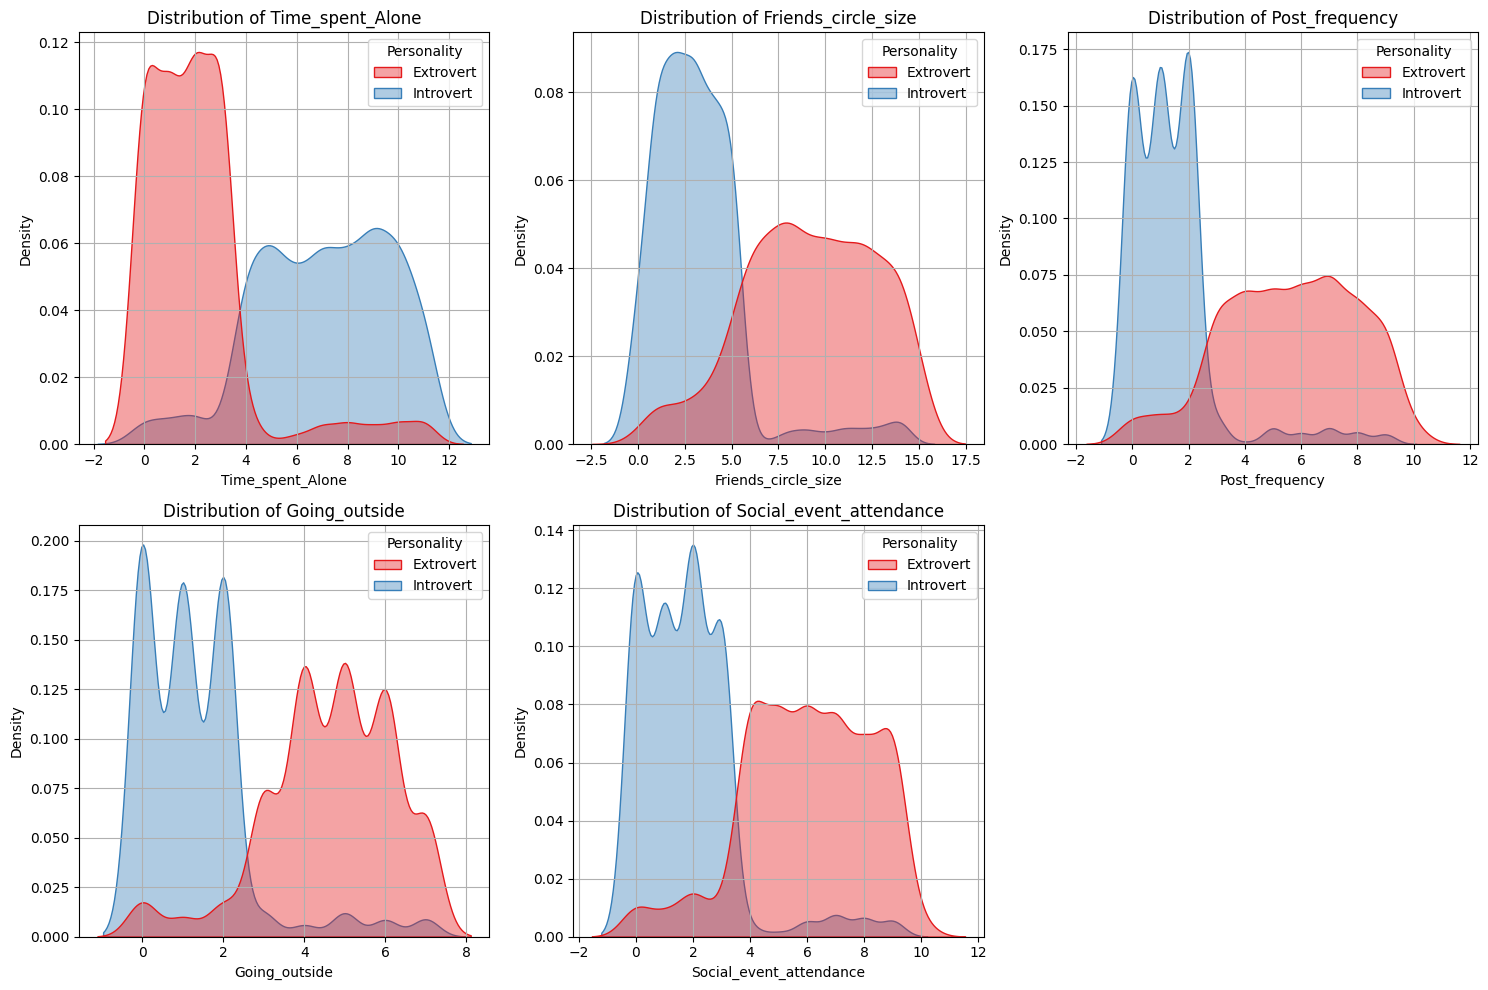

In [13]:
# Density distribution of each behavior by personality
features = [
    'Time_spent_Alone',
    'Friends_circle_size',
    'Post_frequency',
    'Going_outside',
    'Social_event_attendance'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=personalityData, x=feature, hue='Personality', fill=True, alpha=0.4, palette="Set1")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Behavioral Trait Distribution Analysis by Personality

The following density plots and comparative table summarize how behavioral traits differ between **Extroverts** and **Introverts** across key social variables.

---

#### Interpretation Summary:

| **Feature**                | **Extrovert Distribution Pattern**                      | **Introvert Distribution Pattern**                       | **Observation** |
|---------------------------|----------------------------------------------------------|-----------------------------------------------------------|-----------------|
| **Time_spent_Alone**      | Unimodal, sharp peak at low values                      | Bimodal (dual peaks: low and high)                        | Extroverts spend minimal time alone, whereas introverts show more variability with one group spending a lot of time alone. |
| **Friends_circle_size**   | Right-skewed, large networks                            | Left-skewed, small networks                               | Extroverts tend to have large social circles, while introverts are more limited in their close social connections. |
| **Post_frequency**        | Unimodal, moderate frequency                            | Higher density at mid-high frequency                      | Despite stereotypes, many introverts are relatively active online possibly preferring digital socializing. |
| **Going_outside**         | Tall peak at high frequency                             | Broad peak at medium frequency                            | Extroverts frequently go out, while introverts show more moderate tendencies. |
| **Social_event_attendance** | Right-skewed, frequent attendance                       | Left-skewed, rare attendance                              | Social event participation is significantly higher among extroverts. While, much lower social event participation for introverts.  |

---

#### General Insights:

- The KDE plots reveal **distinct behavior profiles** between extroverts and introverts.
- **Extroverts** show concentrated, high-frequency behavior across most social traits.
- **Introverts** demonstrate **greater distribution spread**, especially for **time spent alone** and **post frequency**, indicating more diverse behavior even within the group.
- The **surprising overlap in online activity** suggests introverts may express themselves more in digital spaces.

This visual + tabular combo effectively highlights the behavioral divergence between personality types using distributional characteristics.


## Conclusion
    Through a comprehensive exploratory data analysis (EDA) of the Extrovert vs Introvert Behavior Dataset, we observed and uncover some patterns in how personality types correlate with social behaviors.Key takeaways include:
- Introverts tend to spend more time alone, attend fewer social events, and have smaller social circles.
- Extroverts on the other hand are more socially active, attends more events, and typically have more friends.
- Categorical traits like Stage Fear and Feeling Drained after Socializing show a strong contrast between the two groups, aligning with psychological expectations.
- The Principal Component Analysis (PCA) demonstrated a clear separatation between the two personalities.
- The heatmap also revealed that variables such as social event attendance, post frequency, and going outside are positively correlated, while time spent alone shows a consistent negative correlation with these behaviors.

These patterns/findings support the existing understanding, and theories in psychology regarding introversion and extroversion.